In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import gamma

# Effective degrees of freedom of Welch's t-test

In [3]:
def edf(var_x, x_size, var_y, y_size):
    x = var_x/x_size
    y = var_y/y_size
    top = (x+y)**2
    bottom = ((x**2)/(x_size-1)) + ((y**2)/(y_size-1))
    return top/bottom

# Bias

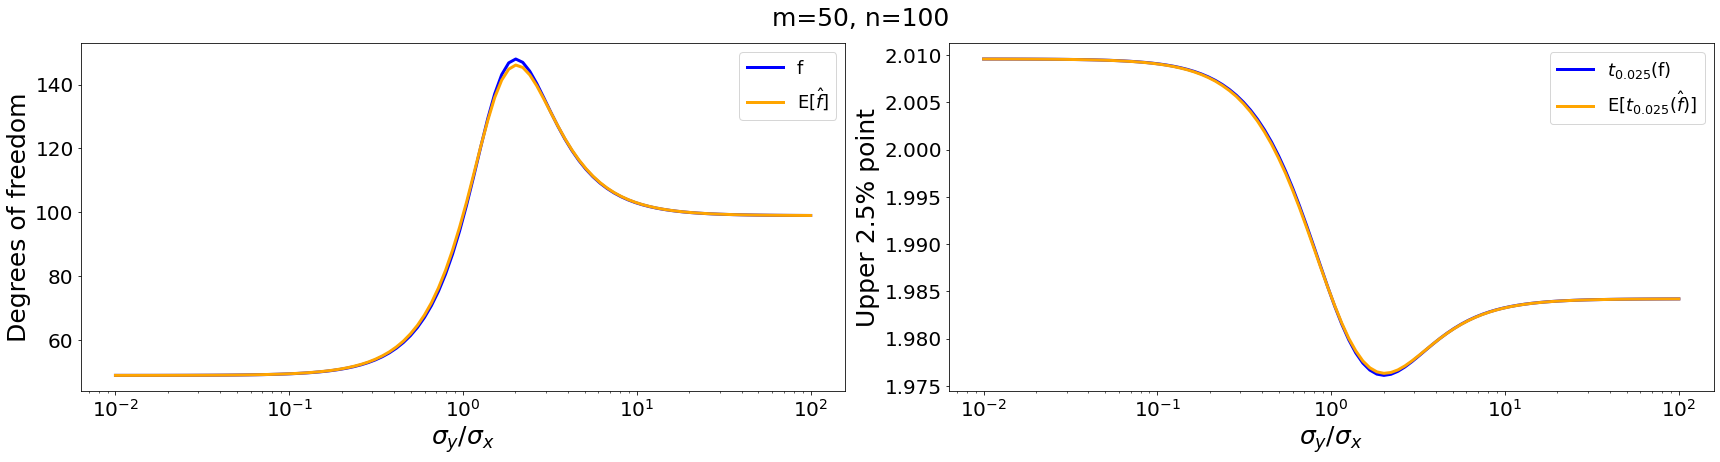

CPU times: total: 16min 45s
Wall time: 16min 46s


In [11]:
%%time
# Settings
N = 100000
mu_x = 0
mu_y = 0
sigma_x = 2
m = 50
n = 100
q = 0.975

# Simulation
ratio_list = []
true_upper_list = []
estimated_upper_list = []
estimated_upper_min_list = []
estimated_upper_max_list = []
diff_mean_list = []
diff_min_list = []
diff_max_list = []
true_edf_list = []
estimated_edf_mean_list = []
for ratio in np.logspace(-2, 2,  num = 100, endpoint = True, base = 10.0):
    sigma_y = sigma_x*ratio
    edf_true = edf(sigma_x**2, m, sigma_y**2, n)
    true_upper = t.ppf(q = q, df = edf_true)
    
    upper_list = []
    diff_list = []
    edf_e_list = []
    for i in range(N):
        X = np.random.normal(mu_x, sigma_x, m)
        Y = np.random.normal(mu_y, sigma_y, n)
        s_x_2 = np.var(X, ddof = 1)
        s_y_2 = np.var(Y, ddof = 1)
        edf_estimete = edf(s_x_2, m, s_y_2, n)
        upper_estimats = t.ppf(q = q, df = edf_estimete)
        upper_list.append(upper_estimats)
        diff_list.append(upper_estimats-true_upper)
        edf_e_list.append(edf_estimete)
        
    true_upper_list.append(true_upper)
    estimated_upper_list.append(np.mean(upper_list))
    estimated_upper_min_list.append(np.min(upper_list))
    estimated_upper_max_list.append(np.max(upper_list))
    ratio_list.append(ratio)
    diff_mean_list.append(np.mean(diff_list))
    diff_min_list.append(np.min(diff_list))
    diff_max_list.append(np.max(diff_list))
    true_edf_list.append(edf_true)
    estimated_edf_mean_list.append(np.mean(edf_e_list))

    
# Plot
fig, ax = plt.subplots(1, 2, figsize = (24, 6.5))

ax[0].plot(ratio_list, true_edf_list, label = 'f', color = 'blue', linewidth = 3)
ax[0].plot(ratio_list, estimated_edf_mean_list, label = r'E[$\hat{f}$]', color = 'orange', linewidth = 3)
ax[0].legend(fontsize = 18)
ax[0].set_xlabel(r'$\sigma_y$/$\sigma_x$', fontsize = 25)
ax[0].set_ylabel('Degrees of freedom', fontsize = 25)
ax[0].tick_params(axis = 'x', labelsize = 20)
ax[0].tick_params(axis = 'y', labelsize = 20)
ax[0].set_xscale('log')

ax[1].plot(ratio_list, true_upper_list, label = '$t_{0.025}$(f)', color = 'blue', linewidth = 3)
ax[1].plot(ratio_list, estimated_upper_list, label = r'E[$t_{0.025}$($\hat{f}$)]', color = 'orange', linewidth = 3)
#ax[1].fill_between(ratio_list, estimated_upper_min_list, estimated_upper_max_list, alpha = 0.2, color = 'orange', label = 'Range')
ax[1].legend(fontsize = 18)
ax[1].set_xlabel(r'$\sigma_y$/$\sigma_x$', fontsize = 25)
ax[1].set_ylabel('Upper ' + str(2.5) + '% point', fontsize = 25)
ax[1].tick_params(axis = 'x', labelsize = 20)
ax[1].tick_params(axis = 'y', labelsize = 20)
ax[1].set_xscale('log')

plt.suptitle(f'm={m}, n={n}', fontsize = 25)
plt.tight_layout()
fig.savefig(r'H:\マイドライブ\01_Project\Qitta\welch_ttest/' + f'percent_point_m={m},n={n}.png', facecolor = 'w')

plt.show()

# Consistency

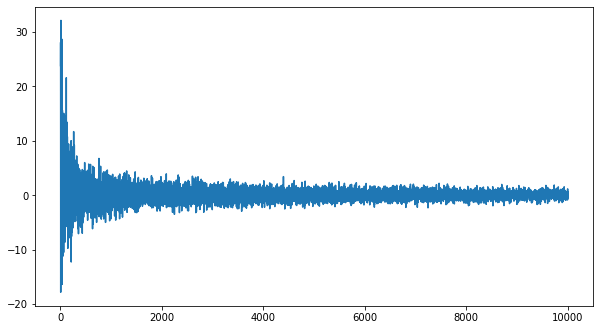

In [14]:
# Setting
mu_x = 0
mu_y = 0
sigma_x = 2
sigma_y = 1
sample_size_ratio = 1

# Simulation
true_edf_list = []
estimated_edf_list = []
sample_size_list = []
percent_error_list = []
for m in range(5, 10000):
    n = sample_size_ratio*m
    X = np.random.normal(mu_x, sigma_x, m)
    Y = np.random.normal(mu_y, sigma_y, n)
    s_x_2 = np.var(X, ddof = 1)
    s_y_2 = np.var(Y, ddof = 1)   
    edf_estimete = edf(s_x_2, m, s_y_2, n)
    edf_true = edf(sigma_x**2, m, sigma_y**2, n)
    true_edf_list.append(edf_true)
    estimated_edf_list.append(edf_estimete)
    sample_size_list.append(m)
    percent_error_list.append(((edf_estimete - edf_true)/edf_true)*100)

plt.figure(figsize = (10, 5.5))
plt.plot(sample_size_list, percent_error_list)
plt.show()

# Approximation of linear combination of chi squared variables

In [35]:
def coef_a(var_x, x_size, var_y, y_size):
    top = var_x/(x_size*(x_size-1))
    bottom = (var_x/x_size) + (var_y/y_size)
    return top/bottom

def coef_b(var_x, x_size, var_y, y_size):
    top = var_y/(y_size*(y_size-1))
    bottom = (var_x/x_size) + (var_y/y_size)
    return top/bottom

def param_f(a, x_size, b, y_size):
    top = (a*(x_size-1) + b*(y_size-1))**2
    bottom = (a**2)*(x_size-1) + (b**2)*(y_size-1)
    return top/bottom

def param_g(a, x_size, b, y_size):
    top = (a**2)*(x_size-1) + (b**2)*(y_size-1)
    bottom = a*(x_size-1) + b*(y_size-1)
    return top/bottom

### Distribution

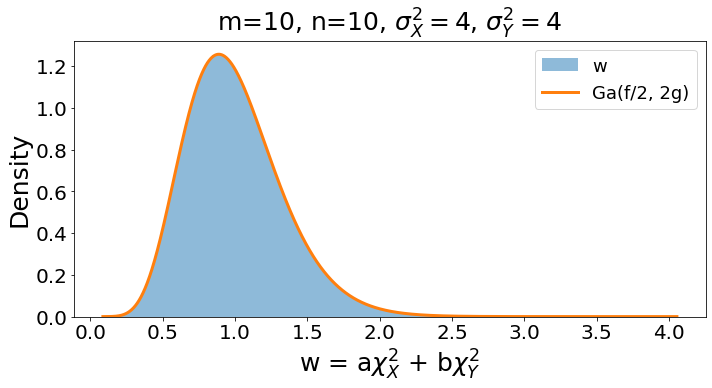

CPU times: total: 5.38 s
Wall time: 5.37 s


In [104]:
%%time
# Settings
N = 10000000
var_x = 4
var_y = 4
m = 10
n = 10

# Simulation
X = np.random.chisquare(df = m-1, size = N)
Y = np.random.chisquare(df = n-1, size = N)
A = coef_a(var_x, m, var_y, n)
B = coef_b(var_x, m, var_y, n)
w = A*X + B*Y
x = np.linspace(w.min(), w.max(), N)
f = param_f(A, m, B, n)
g = param_g(A, m, B, n)
pdf = gamma.pdf(x, a = f/2, scale = 2*g)

# plot
plt.figure(figsize = (10, 5.5))
plt.hist(w, bins = 500, alpha = 0.5, density = True, label = 'w')
plt.plot(x, pdf, label = 'Ga(f/2, 2g)', linewidth = 3)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('w = a$\chi_X^2$ + b$\chi_Y^2$', fontsize = 25)
plt.ylabel('Density', fontsize = 25)
plt.title(f'm={m}, n={n}, $\sigma_X^2={var_x}$, $\sigma_Y^2={var_y}$', fontsize = 25)
plt.tight_layout()
plt.savefig(f'dist_m={m},n={n},sigma_x={var_x},sigma_y={var_y}.png', facecolor = 'w')
plt.show()